<a href="https://colab.research.google.com/github/mrunalmania/Pytorch-Learning/blob/main/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 1. Data Preparing

In [3]:
weight = 0.3
bias = 0.9

start = 0
end = 1
step = 0.01
X = torch.arange(start=start,
                 end=end,
                 step=step)
y = weight*X + bias



In [4]:
X.shape, y.shape

(torch.Size([100]), torch.Size([100]))

## 1.1 Split the data into training and testing

In [8]:
train_split = int(len(X)*0.80)

X_train, y_train = X[:train_split], y[:train_split]
X_test , y_test = X[train_split:], y[train_split:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([80]), torch.Size([20]), torch.Size([80]), torch.Size([20]))

## 1.2 Plot the trainig and testing set

In [24]:
def plot_predictions(train_data: torch.tensor = X_train,
                     train_labels: torch.tensor = y_train,
                     test_data: torch.tensor = X_test,
                     test_labels: torch.tensor = y_test,
                     predictions= None):
  plt.figure(figsize=(12,7))

  plt.scatter(x = train_data, y=train_labels, c="g", label="Training Data")
  plt.scatter(x = test_data, y=test_labels, c="r", label="Testing Data")

  if predictions is not None:
    plt.scatter(x = test_data, y=predictions, c="b", label="Predictions")
    
  plt.legend(prop = {"size": 12})
  

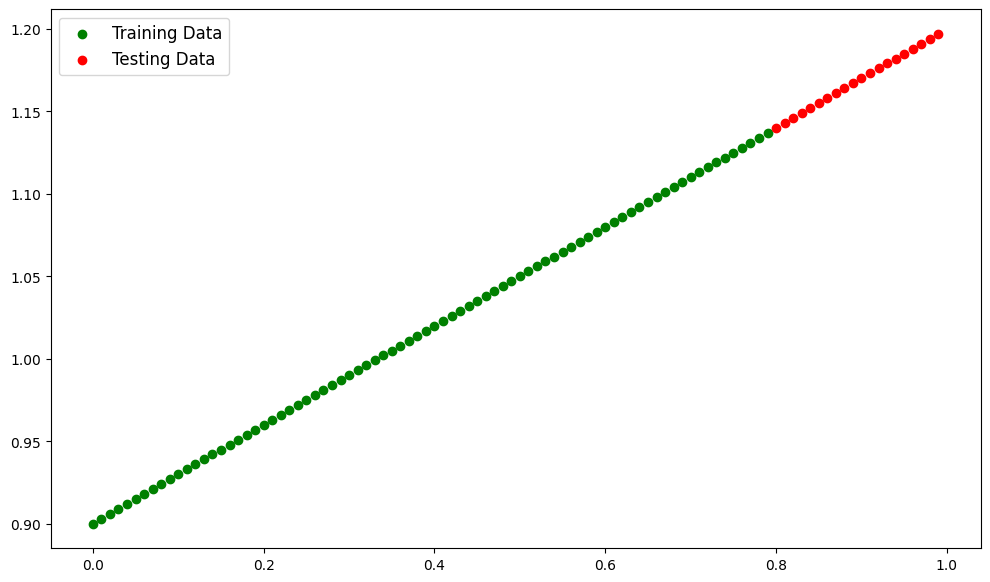

In [12]:
plot_predictions()

# 2. Build a PyTorch model to subclass the `nn.Module`

In [14]:
from torch import nn
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(data = torch.randn(1, dtype=torch.float), requires_grad=True)
    self.bias = nn.Parameter(data=torch.randn(1, dtype=torch.float), requires_grad = True)

  def forward(self, x:torch.tensor):
    x = self.weights * x + self.bias
    return x





In [16]:
model_1 = LinearRegressionModel()
model_1.state_dict()

OrderedDict([('weights', tensor([0.3623])), ('bias', tensor([0.0594]))])

# 3. Create a loss function and optimizet

In [17]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_1.parameters(), lr =0.01)

In [19]:
torch.manual_seed(42)
epochs = 300

train_loss_value = []
test_loss_value = []
epoch_count = []
for epoch in range(epochs):
  # 1. Put model in training mode
  model_1.train()

  # 2. Forward pass
  y_pred = model_1(X_train) 

  # 3. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 4. Zero grad for optimizer
  optimizer.zero_grad()

  # 5. loss backwards
  loss.backward()

  # 6. Optimizer step 
  optimizer.step()


  ### test loop 
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred,y_test)
  
  if epoch % 20 == 0:
    epoch_count.append(epoch)
    train_loss_value.append(loss.detach().numpy())
    test_loss_value.append(test_loss.detach().numpy())
    print(f"Epoch : {epoch} | MAE train loss: {loss} | MAE test loss: {test_loss}")




Epoch : 0 | MAE train loss: 0.8159505724906921 | MAE test loss: 0.7712761163711548
Epoch : 20 | MAE train loss: 0.5847455263137817 | MAE test loss: 0.500571072101593
Epoch : 40 | MAE train loss: 0.35354071855545044 | MAE test loss: 0.22986623644828796
Epoch : 60 | MAE train loss: 0.12233593314886093 | MAE test loss: 0.040838561952114105
Epoch : 80 | MAE train loss: 0.06388942897319794 | MAE test loss: 0.13154752552509308
Epoch : 100 | MAE train loss: 0.05620299652218819 | MAE test loss: 0.12912431359291077
Epoch : 120 | MAE train loss: 0.04934896156191826 | MAE test loss: 0.1138291209936142
Epoch : 140 | MAE train loss: 0.04249493405222893 | MAE test loss: 0.09853395819664001
Epoch : 160 | MAE train loss: 0.03564083203673363 | MAE test loss: 0.0832383781671524
Epoch : 180 | MAE train loss: 0.028788655996322632 | MAE test loss: 0.06725475937128067
Epoch : 200 | MAE train loss: 0.021937459707260132 | MAE test loss: 0.05092718079686165
Epoch : 220 | MAE train loss: 0.015085595659911633 | 

## 3.1 Plot the loss curves

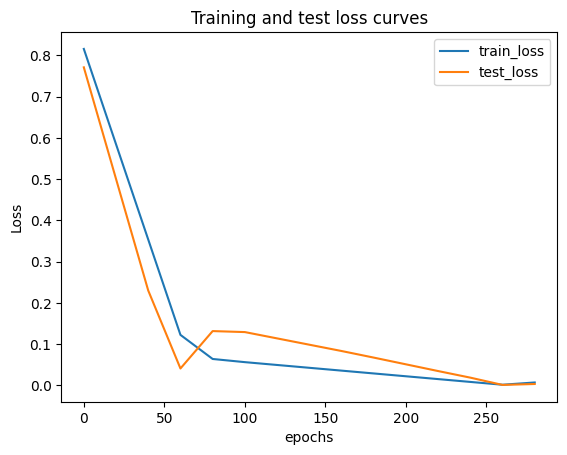

In [21]:
plt.plot(epoch_count, train_loss_value, label="train_loss")
plt.plot(epoch_count, test_loss_value, label="test_loss")

plt.title('Training and test loss curves')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()

# 4. Making predictions

In [22]:
model_1.eval()

with torch.inference_mode():
  y_pred_test = model_1(X_test)
y_pred_test

tensor([1.1497, 1.1527, 1.1558, 1.1589, 1.1619, 1.1650, 1.1681, 1.1712, 1.1742,
        1.1773, 1.1804, 1.1834, 1.1865, 1.1896, 1.1926, 1.1957, 1.1988, 1.2018,
        1.2049, 1.2080])

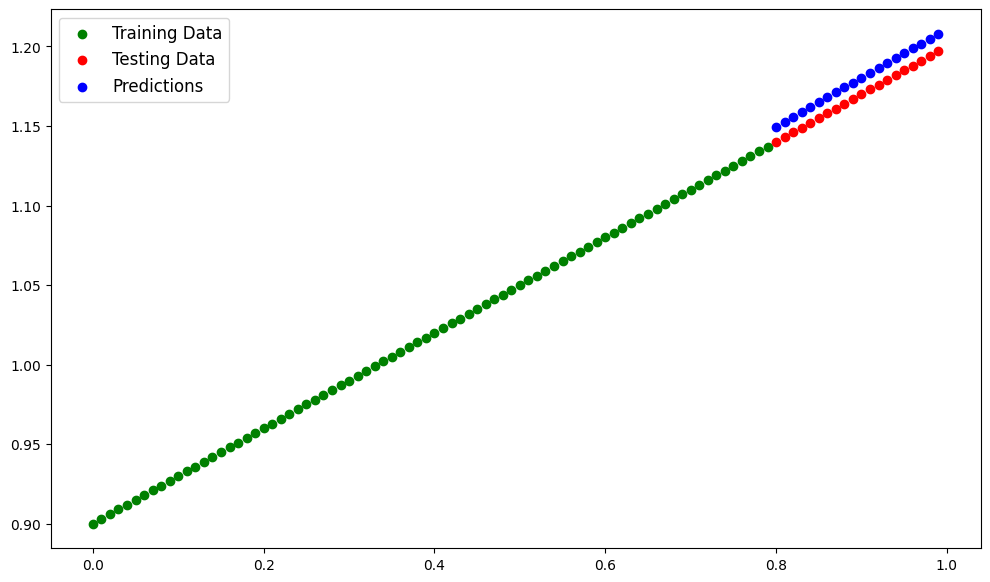

In [25]:
plot_predictions(predictions=y_pred_test)

# 5. Save the model

In [30]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "LinearRegressionModel1.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

torch.save(model_1.state_dict(),
           f=MODEL_SAVE_PATH)

### 5.1 Load the model which we have just saved


In [31]:
model_2 = LinearRegressionModel()
model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

### 5.2 Make predictions with loaded model and plot it

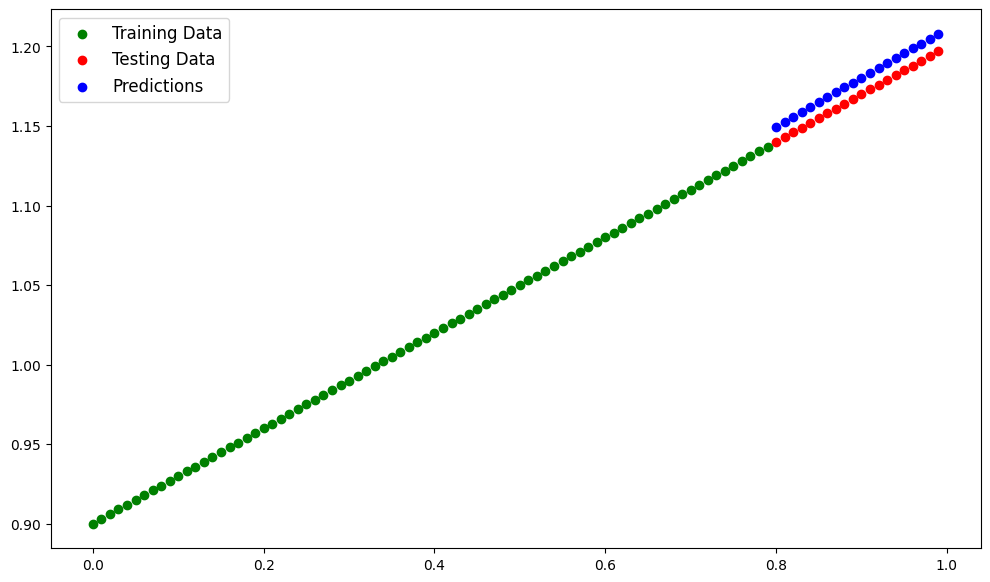

In [32]:
model_2.eval()
with torch.inference_mode():
  y_pred_load = model_2(X_test)


plot_predictions(predictions=y_pred_load)